# TP3 : Arbres de classification

### Importation des données

In [12]:
import tp_tree_source as source_TP3

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

1/ on part de la racine avec tout l'ensemble X
2/ A chaque étape on décide où élaguer l'arbre
    Pour cela on définit une fonctione de critère H(r) : 
        - Gini
        - Entropie
Ensuite, on résout : $argmin\{q_{j,t} + (1 - q_{j,t}) H(D)\}$
    

## Arbres de décision - Algorithme CART

#### Question 1 : 

Dans le cadre de la régression (i.e., quand on cherche à prédire une valeur numérique pour Y et non une classe), proposez une autre mesure d’homogénéité. Justifier votre choix.

#### Question 2 : 

Simulez avec rand_checkers des échantillons de taille n = 456 (attention à bien équilibrer les classes). Créez deux courbes qui donnent le pourcentage d’erreurs commises en fonction de la profondeur maximale de l’arbre (une courbe pour Gini, une courbe pour l’entropie). On laissera les autres paramètres à leur valeurs par défaut.

#### On génère les données

In [2]:
n_sample_part = 456 // 4
#print(n_sample_part)

data_rand_checker = source_TP3.rand_checkers(n1=n_sample_part, n2=n_sample_part, n3=n_sample_part, n4=n_sample_part, sigma=0.1)

print(data_rand_checker)

[[ 1.56156289 -0.87613796  2.        ]
 [ 1.25558452 -0.32875404  2.        ]
 [ 1.98237778 -1.31375967  3.        ]
 ...
 [-1.97769028  1.19903962  1.        ]
 [-0.15682183 -0.47814295  0.        ]
 [ 0.30515866  0.6284167   0.        ]]


In [3]:
X_train = data_rand_checker[:, [0,1]]
print(X_train)

y_train = data_rand_checker[:, 2]
print(y_train)

[[ 1.56156289e+00 -8.76137959e-01]
 [ 1.25558452e+00 -3.28754043e-01]
 [ 1.98237778e+00 -1.31375967e+00]
 [ 9.40118929e-01  4.43015183e-01]
 [ 1.83679255e+00 -1.73391981e+00]
 [ 1.81619819e-01  1.62462993e+00]
 [-1.44086679e+00 -1.15672738e+00]
 [-7.99580694e-01  1.61168309e+00]
 [-4.72872141e-01  6.36615287e-01]
 [ 1.36650021e+00  2.67071048e-01]
 [ 8.79072163e-01 -1.32267952e+00]
 [ 1.01104127e+00  1.91267218e-01]
 [-6.37762765e-02  3.24215710e-01]
 [ 2.03998901e+00 -4.35846546e-01]
 [-2.09072463e+00 -4.02692929e-01]
 [-3.81409703e-01 -5.74819548e-01]
 [ 3.90836806e-01 -6.59958469e-01]
 [ 1.82917003e-01  7.41794226e-01]
 [ 2.11098175e-01  1.65253950e+00]
 [-1.01944302e+00 -7.22474695e-01]
 [-2.13682843e-02  1.75985372e+00]
 [-2.75721416e-03  7.51224437e-01]
 [ 1.98985828e+00 -1.88572930e+00]
 [-1.65551945e+00 -1.27145176e+00]
 [-1.98646962e+00  7.46950584e-01]
 [-1.03200403e+00  5.29355434e-01]
 [ 6.09626261e-01  1.78926995e+00]
 [-4.26138812e-01 -3.78908336e-01]
 [-3.28533398e-02 -9

#### On applique l'algorithme DecisionTreeClassifier de la librairie de scikit-learn

In [4]:
range_n = np.arange(1, 21, 1)
score_gini_list = list()

for i in range_n: 
    tre_clf_gini = tree.DecisionTreeClassifier(criterion = "gini", max_depth = i)
    tre_clf_gini.fit(X_train, y_train)
    score_gini = tre_clf_gini.score(X_train, y_train)
    score_gini_list.append(score_gini)
    
score_entropie_list = list()
for k in range_n:
    tre_clf_entropie = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = k)
    tre_clf_entropie.fit(X_train, y_train)
    score_entropie = tre_clf_entropie.score(X_train, y_train)
    score_entropie_list.append(score_entropie)


[]

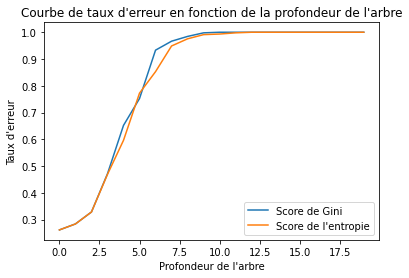

In [5]:
plt.plot(score_gini_list, label = "Score de Gini")
plt.plot(score_entropie_list, label = "Score de l'entropie")
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Taux d'erreur")
plt.title("Courbe de taux d'erreur en fonction de la profondeur de l'arbre")
plt.legend()
plt.plot()

#### Question 3 : 

Afficher la règle de classification obtenues en utilisant la profondeur qui minimise le pourcentage d’erreurs obtenues avec l’entropie et avec l’indice de Gini (utiliser si besoin les fonctions plot_2d et frontiere du fichier source).

#### Gini

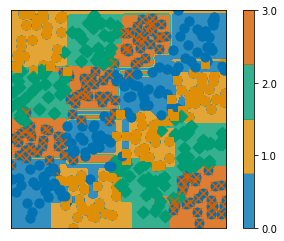

In [6]:
tre_clf_gini = tree.DecisionTreeClassifier(criterion = "gini", max_depth = i)
tre_clf_gini = tre_clf_gini.fit(X_train, y_train)
source_TP3.plot_2d(data_rand_checker)

def f(x):
    return tre_clf_gini.predict(x.reshape(1,-1))

source_TP3.frontiere_new(f, X_train, y_train)

#### Entropie

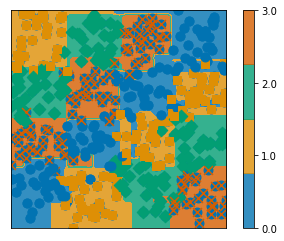

In [7]:
tre_clf_entropie = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = i)
tre_clf_entropie = tre_clf_entropie.fit(X_train, y_train)
source_TP3.plot_2d(data_rand_checker)

def f(x):
    return tre_clf_entropie.predict(x.reshape(1,-1))

source_TP3.frontiere_new(f, X_train, y_train)

#### Question 4 :

Exporter des graphiques des arbres obtenu à la question précédente en format pdf. On pourra par exemple utiliser la fonction export_graphviz du module tree.

#### Gini

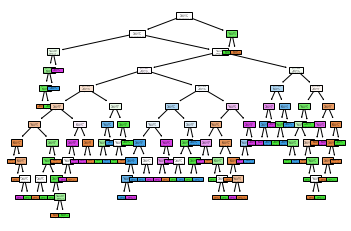

In [15]:
tree.plot_tree(tre_clf_gini, filled = True);

#### Entropie

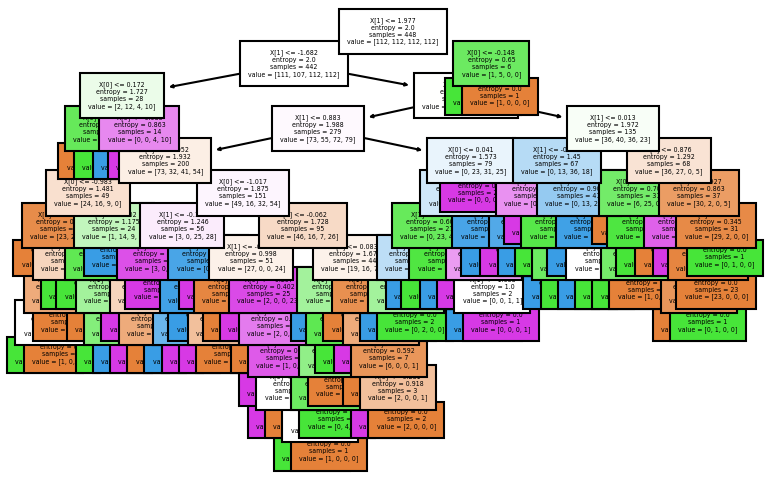

In [25]:
plt.figure(dpi = 150)
tree.plot_tree(tre_clf_entropie, filled = True, fontsize = 3);

#### Question 5

Créez n = 160 = 40 + 40 + 40 + 40 nouvelles données avec rand_checkers. Pour les arbres de décision entraînés précédemment (dans partie (2)), calculer la proportion d’erreurs faites sur cet échantillon de test. Commenter.

In [9]:
data_rand_checker_bis = source_TP3.rand_checkers(n1=40, n2=40, n3=40, n4=40, sigma=0.1)

X_test = data_rand_checker_bis[:, [0,1]]
print(X_test)

y_test = data_rand_checker_bis[:, 2]
print(y_test)

[[ 0.43619506  1.48766659]
 [ 0.16186016  1.14017943]
 [ 0.63119318 -0.61256356]
 [-0.81009283 -1.93284642]
 [-1.26961367 -1.39590078]
 [ 1.88410851  0.16782236]
 [-0.84417608 -0.13628297]
 [-0.47924712  0.35411104]
 [ 1.77547903  1.38434693]
 [-0.26738976 -0.71568108]
 [-1.16127283  0.1784886 ]
 [-1.35098955  0.10398953]
 [ 1.29003808  1.19139386]
 [-0.70646615 -0.38155714]
 [ 0.00745744 -0.38504909]
 [-0.73960106 -0.15072022]
 [ 1.01102768 -1.11575358]
 [-1.02407126  0.63287734]
 [ 1.8703695   1.60689121]
 [ 1.29739159 -1.40692586]
 [-1.77406167 -1.73456905]
 [-1.11034601  1.23235852]
 [ 0.73725098 -1.62114825]
 [-0.1504412   2.0264566 ]
 [ 1.76144331  0.06104753]
 [-1.29730148 -0.04120302]
 [-0.11837848  1.14195143]
 [-1.22587011 -0.99961137]
 [-0.02012171  0.6166395 ]
 [-1.78203027 -0.44657202]
 [ 0.66147771  1.15241935]
 [-1.57036522 -0.99713735]
 [ 1.70657381  0.20893346]
 [ 0.69751783  0.10738554]
 [ 1.02140327  1.73696605]
 [-1.5970311  -0.58296812]
 [ 0.77741152  0.13072949]
 

In [10]:
range_n = np.arange(1, 21, 1)
score_gini_list_bis = list()

for i in range_n: 
    tre_clf_gini_bis = tree.DecisionTreeClassifier(criterion = "gini", max_depth = i)
    tre_clf_gini_bis.fit(X_train, y_train)
    score_gini_bis = tre_clf_gini_bis.score(X_test, y_test)
    score_gini_list_bis.append(score_gini_bis)
    
score_entropie_list_bis = list()
for k in range_n:
    tre_clf_entropie_bis = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = k)
    tre_clf_entropie_bis.fit(X_train, y_train)
    score_entropie_bis = tre_clf_entropie_bis.score(X_test, y_test)
    score_entropie_list_bis.append(score_entropie_bis)


[]

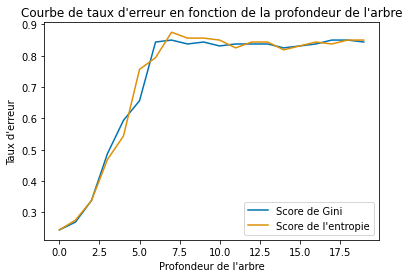

In [11]:
plt.plot(score_gini_list_bis, label = "Score de Gini")
plt.plot(score_entropie_list_bis, label = "Score de l'entropie")
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Taux d'erreur")
plt.title("Courbe de taux d'erreur en fonction de la profondeur de l'arbre")
plt.legend()
plt.plot()

#### Question 6 :

Reprendre les questions précédentes pour le dataset zipcode. Ce jeu de données est disponible dans le module sklearn.datasets. On peut l’importer avec la fonction load_digits du dit module (ou voir pour plus de détails http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) :

In [31]:
data_digits = load_digits()
data_digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [32]:
X_digits = data_digits.data
y_digits = data_digits.target

from sklearn.model_selection import train_test_split

X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size=0.20, random_state=42)

In [33]:
range_n = np.arange(1, 21, 1)
score_gini_list_digits = list()

for i in range_n: 
    tre_clf_gini_digits = tree.DecisionTreeClassifier(criterion = "gini", max_depth = i)
    tre_clf_gini_digits.fit(X_train_digits, y_train_digits)
    score_gini_digits = tre_clf_gini_digits.score(X_test_digits, y_test_digits)
    score_gini_list_digits.append(score_gini_digits)
    
score_entropie_list_digits = list()
for k in range_n:
    tre_clf_entropie_digits = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = k)
    tre_clf_entropie_digits.fit(X_train_digits, y_train_digits)
    score_entropie_digits = tre_clf_entropie_digits.score(X_test_digits, y_test_digits)
    score_entropie_list_digits.append(score_entropie_digits)

[]

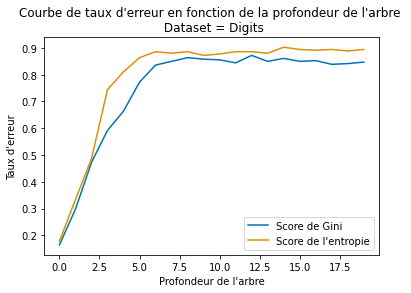

In [34]:
plt.plot(score_gini_list_digits, label = "Score de Gini")
plt.plot(score_entropie_list_digits, label = "Score de l'entropie")
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Taux d'erreur")
plt.title("Courbe de taux d'erreur en fonction de la profondeur de l'arbre \n Dataset = Digits")
plt.legend()
plt.plot()

#### Arbre de décision avec Gini pour le dataset digits

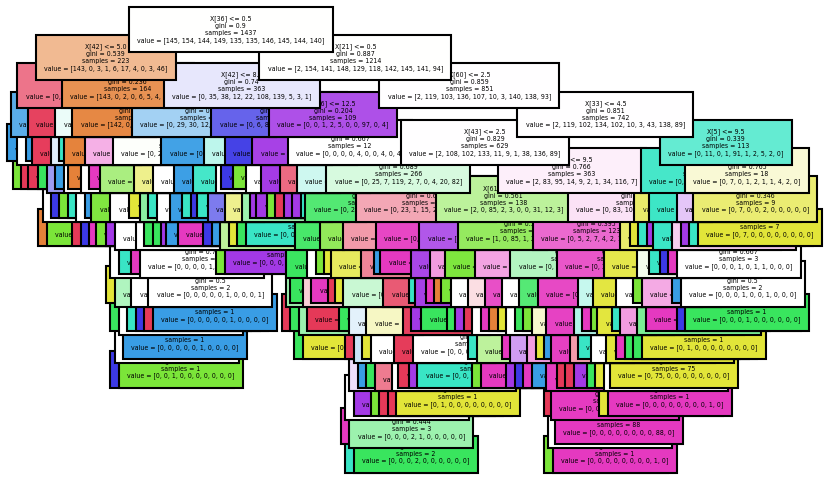

In [35]:
plt.figure(dpi = 150)
tree.plot_tree(tre_clf_gini_digits, filled = True, fontsize = 3);

#### Arbre de décision avec Entropie pour le dataset digits

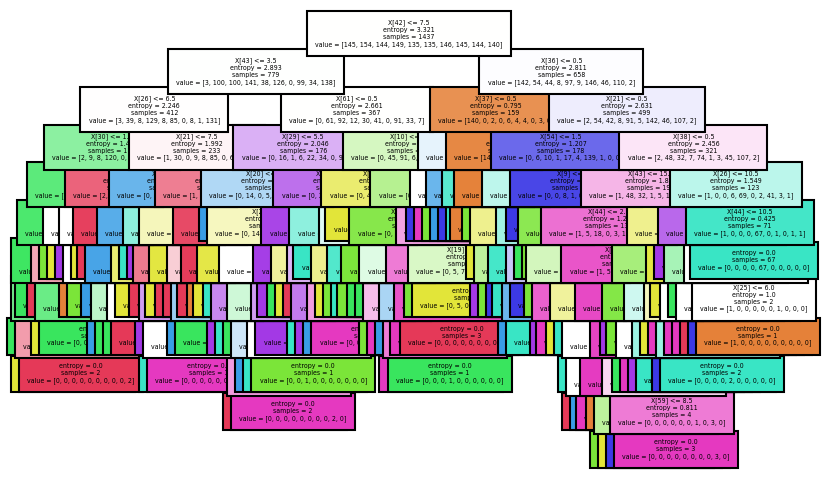

In [36]:
plt.figure(dpi = 150)
tree.plot_tree(tre_clf_entropie_digits, filled = True, fontsize = 3);